In [23]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

from path import Path
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

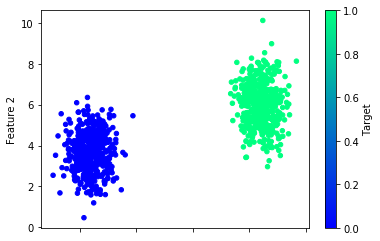

In [24]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [25]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [26]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [28]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [29]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [30]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 578us/sample - loss: 0.5247 - acc: 0.9973
Epoch 2/100
750/750 [==============================] - 0s 79us/sample - loss: 0.5108 - acc: 0.9987
Epoch 3/100
750/750 [==============================] - 0s 96us/sample - loss: 0.4970 - acc: 0.9987
Epoch 4/100
750/750 [==============================] - 0s 67us/sample - loss: 0.4830 - acc: 1.0000
Epoch 5/100
750/750 [==============================] - 0s 63us/sample - loss: 0.4692 - acc: 1.0000
Epoch 6/100
750/750 [==============================] - 0s 79us/sample - loss: 0.4557 - acc: 1.0000
Epoch 7/100
750/750 [==============================] - 0s 63us/sample - loss: 0.4423 - acc: 1.0000
Epoch 8/100
750/750 [==============================] - 0s 65us/sample - loss: 0.4293 - acc: 1.0000
Epoch 9/100
750/750 [==============================] - 0s 83us/sample - loss: 0.4166 - acc: 1.0000
Epoch 10/100
750/750 [==============================] - 0s 60us/sample - loss: 0.4043 - acc: 1.0000
Epoch 11

750/750 [==============================] - 0s 64us/sample - loss: 0.0910 - acc: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 77us/sample - loss: 0.0897 - acc: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 68us/sample - loss: 0.0883 - acc: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 73us/sample - loss: 0.0870 - acc: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 104us/sample - loss: 0.0857 - acc: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 93us/sample - loss: 0.0844 - acc: 1.0000
Epoch 88/100
750/750 [==============================] - 0s 69us/sample - loss: 0.0831 - acc: 1.0000
Epoch 89/100
750/750 [==============================] - 0s 72us/sample - loss: 0.0819 - acc: 1.0000
Epoch 90/100
750/750 [==============================] - 0s 95us/sample - loss: 0.0807 - acc: 1.0000
Epoch 91/100
750/750 [==============================] - 0s 105us/sample - loss: 0.0795 - acc: 1.0000
Epoch 92/10

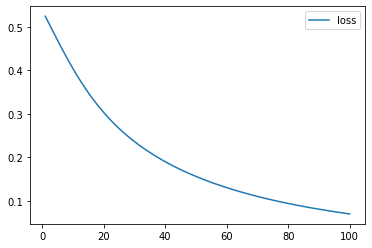

In [33]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

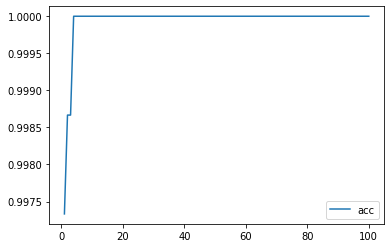

In [35]:
# Plot the accuracy
history_df.plot(y="acc")

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0656 - acc: 1.0000
Loss: 0.06562902563810348, Accuracy: 1.0


In [37]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

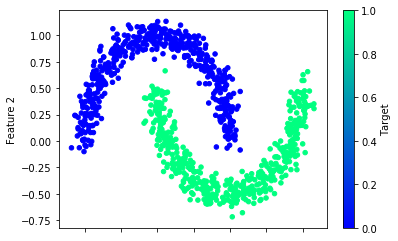

In [38]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [39]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [40]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 64us/sample - loss: 0.8263 - acc: 0.6187
Epoch 2/100
750/750 [==============================] - 0s 61us/sample - loss: 0.7374 - acc: 0.6400
Epoch 3/100
750/750 [==============================] - 0s 77us/sample - loss: 0.6759 - acc: 0.6600
Epoch 4/100
750/750 [==============================] - 0s 66us/sample - loss: 0.6356 - acc: 0.6733
Epoch 5/100
750/750 [==============================] - 0s 65us/sample - loss: 0.6060 - acc: 0.6827
Epoch 6/100
750/750 [==============================] - 0s 137us/sample - loss: 0.5824 - acc: 0.6920
Epoch 7/100
750/750 [==============================] - 0s 64us/sample - loss: 0.5637 - acc: 0.6987
Epoch 8/100
750/750 [==============================] - 0s 67us/sample - loss: 0.5474 - acc: 0.7147
Epoch 9/100
750/750 [==============================] - 0s 60us/sample - loss: 0.5337 - acc: 0.7187
Epoch 10/100
750/750 [==============================] - 0s 56us/sample - loss: 0.5209 - acc: 0.7267
Epoch 11

750/750 [==============================] - 0s 64us/sample - loss: 0.2674 - acc: 0.8920
Epoch 83/100
750/750 [==============================] - 0s 84us/sample - loss: 0.2670 - acc: 0.8920
Epoch 84/100
750/750 [==============================] - 0s 65us/sample - loss: 0.2666 - acc: 0.8907
Epoch 85/100
750/750 [==============================] - 0s 63us/sample - loss: 0.2663 - acc: 0.8907
Epoch 86/100
750/750 [==============================] - 0s 71us/sample - loss: 0.2659 - acc: 0.8907
Epoch 87/100
750/750 [==============================] - 0s 84us/sample - loss: 0.2656 - acc: 0.8907
Epoch 88/100
750/750 [==============================] - 0s 62us/sample - loss: 0.2652 - acc: 0.8920
Epoch 89/100
750/750 [==============================] - 0s 74us/sample - loss: 0.2650 - acc: 0.8920
Epoch 90/100
750/750 [==============================] - 0s 97us/sample - loss: 0.2646 - acc: 0.8920
Epoch 91/100
750/750 [==============================] - 0s 89us/sample - loss: 0.2643 - acc: 0.8920
Epoch 92/100


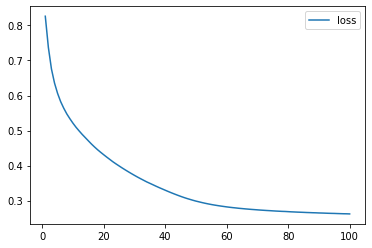

In [41]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

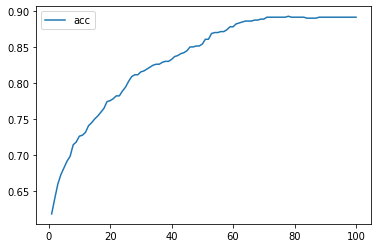

In [42]:
# Plot the loss
history_df.plot(y="acc")

In [43]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [44]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [45]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 317us/sample - loss: 0.7198 - acc: 0.5053
Epoch 2/100
750/750 [==============================] - 0s 100us/sample - loss: 0.6800 - acc: 0.5640
Epoch 3/100
750/750 [==============================] - 0s 118us/sample - loss: 0.6434 - acc: 0.5987
Epoch 4/100
750/750 [==============================] - 0s 114us/sample - loss: 0.6105 - acc: 0.6160
Epoch 5/100
750/750 [==============================] - 0s 129us/sample - loss: 0.5807 - acc: 0.6560
Epoch 6/100
750/750 [==============================] - 0s 69us/sample - loss: 0.5532 - acc: 0.6813
Epoch 7/100
750/750 [==============================] - 0s 77us/sample - loss: 0.5280 - acc: 0.6987
Epoch 8/100
750/750 [==============================] - 0s 90us/sample - loss: 0.5053 - acc: 0.7147
Epoch 9/100
750/750 [==============================] - 0s 64us/sample - loss: 0.4842 - acc: 0.7440
Epoch 10/100
750/750 [==============================] - 0s 62us/sample - loss: 0.4648 - acc: 0.7813
Epoc

750/750 [==============================] - 0s 61us/sample - loss: 0.2248 - acc: 0.8987
Epoch 83/100
750/750 [==============================] - 0s 120us/sample - loss: 0.2237 - acc: 0.9000
Epoch 84/100
750/750 [==============================] - 0s 86us/sample - loss: 0.2227 - acc: 0.8987
Epoch 85/100
750/750 [==============================] - 0s 66us/sample - loss: 0.2216 - acc: 0.9027
Epoch 86/100
750/750 [==============================] - 0s 98us/sample - loss: 0.2206 - acc: 0.9000
Epoch 87/100
750/750 [==============================] - 0s 92us/sample - loss: 0.2196 - acc: 0.9027
Epoch 88/100
750/750 [==============================] - 0s 90us/sample - loss: 0.2184 - acc: 0.9040
Epoch 89/100
750/750 [==============================] - 0s 96us/sample - loss: 0.2174 - acc: 0.9040
Epoch 90/100
750/750 [==============================] - 0s 125us/sample - loss: 0.2163 - acc: 0.9040
Epoch 91/100
750/750 [==============================] - 0s 70us/sample - loss: 0.2150 - acc: 0.9040
Epoch 92/10